# Исследование данных о российском кинопрокате

По заказу Министерства культуры Российской Федерации необходимо изучить рынок российского кинопроката, выявить текущие тренды и изучить влияние государственной поддержки фильмов.  
В качестве входных данных есть два файла
- набор данных с номерами прокатных удостоверений, информацией о фильмах с сайта Кинопоиск и размерами государственной поддержки и бюджетами фильмов;
- набор данных с номерами прокатных удостоверений и сборами фильмов в кинотеатрах

Цель исследования
- изучить динамику проката по годам;
- изучить изменение сумм сборов в разные годы;
- изучить влияние возрастной категории на сборы фильмов;
- изучить изменение объемов государственной поддержки по годам; 
- проанализировать влияние государственной поддержки на прибыльность фильмов;
- проверить влияние государственной поддержки на рейтинг фильмов. 

# Оглавление  
1 Открываем файлы с данными и объединяем их в один датафрейм  
1.1 Импортируем библиотеки необходимы для работы с табличными данными и построения графиков  
1.2 Получение данных из файла `mkrf_movies.csv`  
1.3 Получение данных из файла `mkrf_shows.csv`  
2 Предобработка данных  
2.1 Проверка корректности типов данных в столбцах  
2.1.1 Изменение типа данных в столбце `show_start_date`  
2.1.2 Изменение типа данных в столбце `ratings`  
2.2 Анализ и устранение пропущенных значений в столбцах  
2.2.1 Замена пропусков в столбцах `refundable_support`, `nonrefundable_support`, `financing_source`  
2.2.2 Замена пропусков в столбцах `film_studio`, `production_country`, `director`, `producer`, `genres`  
2.3 Анализ и устранение дубликатов  
2.3.1 Неявные дубликаты  
2.3.1.1 Колонка `type`  
2.3.1.2 Колонка `film_studio`  
2.3.1.3 Колонка `director`  
2.3.1.4 Колонка `producer`  
2.3.1.5 Колонка `age_restriction`  
2.3.1.6 Колонка `financing_source`  
2.3.1.7 Колонка `genres`  
2.3.2 Явные дубликаты  
2.4 Изучение категориальных значений  
2.5 Изучение количественных значений  
2.5.1 Столбец `puNumber`  
2.5.2 Столбец `refundable_support`  
2.5.3 Столбец `nonrefundable_support`  
2.5.4 Столбец `budget`  
2.5.5 Связка столбцов `refundable_support`, `nonrefundable_support` и `budget`  
2.5.6 Столбец `ratings`  
2.5.7 Столбец `box_office`  
2.6 Добавляем в таблицу новые столбцы  
2.6.1 Столбец `year`  
2.6.2 Столбцы `name` и `surname`  
2.6.3 Столбец с долей поддержки от общего бюджета фильма  
3 Исследовательский анализ данных  
3.1 Доля фильмов без информации о прокате  
3.2 Распределение фильмов по годам  
3.3 Суммы сборов по годам  
3.4 Сравнение средних и медианных сборов по годам  
3.5 Сравнение влияния возрастного ограничения на сборы  
4 Исследование фильмов с государственной поддержкой  
4.1 Исселдование изменения видов государственной поддержки по годам  
4.2 Изменение количества фильмов с государственой поддержкой по годам  
4.3 Исследование окупаемости фильмов с государственной поддержкой  
4.4 Исследование влияние государственной поддержки на рейтинг фильмов  
5 Вывод

## 1 Открываем файлы с данными и объединяем их в один датафрейм

### 1.1 Импортируем библиотеки необходимы для работы с табличными данными и построения графиков

In [1]:
import pandas as pd
import numpy as np

# для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Получение данных из файла `mkrf_movies.csv`

In [2]:
mkrf_movies_df=pd.read_csv('mkrf_movies.csv')

Смотрим на получившийся DataFrame

In [4]:
mkrf_movies_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


DataFrame получился корректный, разделитель и кодировка были выбраны правильно.

Смотрим общую информацию о DataFrame `mkrf_movies_df` используя метод `info()`.

In [5]:
mkrf_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Мы получили DataFrame, который содержит 15 столбцов и 7486 строк.  
Уже сейчас мы видим, что
- в DataFrame есть пропущенные значения;
- в столбце `puNumber` тип данных определился как `object` вместо `int`;
- в столбце `show_start_date` тип данных определился как `object` вместо `datetime64[ns]`;
- в столбце `ratings` тип данных определился как `object` вместо `float`

### 1.3 Получение данных из файла `mkrf_shows.csv`

In [6]:
mkrf_shows_df=pd.read_csv('mkrf_shows.csv')

Смотрим на получившийся DataFrame

In [8]:
mkrf_shows_df.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Смотрим общую информацию о DataFrame `mkrf_shows_df` используя метод `info()`.

In [9]:
mkrf_shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Смотрим статистическую информацию о DataFrame `mkrf_shows_df` используя метод `describe()`.

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mkrf_shows_df.describe()

,puNumber,box_office
count,3158.00,3158.00
mean,120187475.32,76478696.16
std,12383941.15,240353122.82
min,111000113.00,0.00
25%,113000191.75,86239.00
50%,121013114.50,2327987.55
75%,121028317.75,23979671.02
max,224026410.00,3073568690.79


Мы получили DataFrame, который содержит 2 столбца и 3158 строк.  
Уже сейчас мы видим, что
- в DataFrame нет пропущенных значений;
- типы данных в столбцах определились корректно

Промежуточный вывод по полученной информации о двух DataFrame

Для того чтобы объединить имеющиеся два DataFrame мы можем использовать столбец `puNumber` и функцию `merge()`, но предварительно нужно изменить тип столбца `puNumber` в `mkrf_movies_df` с `object` на `int`

### 1.4 Объединяем два DataFrame в один

Меняем тип данных в столбце `puNumber` в `mkrf_movies_df` с `object` вместо `int`, но предварительно проверим почему тп данных определился некорректно

Проверяем есть ли в столбце `puNumber` значения, которые не являются числовыми

In [11]:
mkrf_movies_df[~mkrf_movies_df['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Удаляем строку с индексом 1797

In [12]:
mkrf_movies_df=mkrf_movies_df.drop(1797)

Меняем тип данных в столбце `puNumber`

In [13]:
mkrf_movies_df['puNumber']=mkrf_movies_df['puNumber'].astype('int')

Проверяем типы данных

In [14]:
mkrf_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Тип данных поменяли

Объединяем два DataFrame по столбцу `puNumber`, за основной возьмем DataFrame `mkrf_movies_df`, а режим объединения выберем `left`, чтобы сохранить все строки основного DataFrame

In [15]:
df=mkrf_movies_df.merge(mkrf_shows_df, on='puNumber', how='left')

Проверяем, что объединение прошло корректно

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7485.00,332.00,332.00,332.00,3158.00
mean,135196587.56,11864457.83,48980988.89,127229716.68,76478696.16
std,38352919.34,24916555.26,59980117.92,188588333.12,240353122.82
min,1811096.00,0.00,0.00,0.00,0.00
25%,112025118.00,0.00,25000000.00,42000000.00,86239.00
50%,121015510.00,0.00,30000000.00,68649916.00,2327987.55
75%,124003314.00,15000000.00,40375000.00,141985319.50,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,3073568690.79


In [18]:
mkrf_shows_df.describe()

,puNumber,box_office
count,3158.00,3158.00
mean,120187475.32,76478696.16
std,12383941.15,240353122.82
min,111000113.00,0.00
25%,113000191.75,86239.00
50%,121013114.50,2327987.55
75%,121028317.75,23979671.02
max,224026410.00,3073568690.79


In [19]:
mkrf_movies_df.describe()

,puNumber,refundable_support,nonrefundable_support,budget
count,7485.00,332.00,332.00,332.00
mean,135196587.56,11864457.83,48980988.89,127229716.68
std,38352919.34,24916555.26,59980117.92,188588333.12
min,1811096.00,0.00,0.00,0.00
25%,112025118.00,0.00,25000000.00,42000000.00
50%,121015510.00,0.00,30000000.00,68649916.00
75%,124003314.00,15000000.00,40375000.00,141985319.50
max,231001111.00,180000000.00,400000000.00,2305074303.00


Итак, после объединения двух DataFrame:
- количество строк, которое было в `mkrf_movies_df` до объединения не уменьшилось;
- каждой строке из `mkrf_shows_df` нашлось только одно соответсвие

In [20]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Итак, мы получили данные из двух файлов и объединили их в один DataFrame по общему столбцу `puNumber`. Одну строку пришлось удалить, так как данные в ней не позволяли привести столбцы к единому типу и объединить два DataFrame.

## 2 Предобработка данных

### 2.1 Проверка корректности типов данных в столбцах

Согласно документации мы имеем следующие столбцы в данных  
-	`title` — название фильма;
-	`puNumber` — номер прокатного удостоверения;
-	`show_start_date` — дата премьеры фильма;
-	`type` — тип фильма;
-	`film_studio` — студия-производитель;
-	`production_country` — страна-производитель;
-	`director` — режиссёр;
-	`producer` — продюсер;
-	`age_restriction` — возрастная категория;
-	`refundable_support` — объём возвратных средств государственной поддержки;
-	`nonrefundable_support` — объём невозвратных средств государственной поддержки;
-	`budget` — общий бюджет фильма;
-	`financing_source` — источник государственного финансирования;
-	`ratings` — рейтинг фильма на КиноПоиске;
-	`genres` — жанр фильма;
-	`box_office` — сборы в рублях.

Смотрим на типы данных в получившемся DataFrame

In [21]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Мы видим, что следующие столбцы имеют некорректный тип данных:
- в столбце `show_start_date` тип данных определился как `object` вместо `datetime64[ns]`;
- в столбце `ratings` тип данных определился как `object` вместо `float`

#### 2.1.1 Изменение типа данных в столбце `show_start_date`

In [22]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Проверяем, изменился ли тип данных

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Смотрим, на данные в DataFrame

In [24]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Тип данных в столбце `show_start_date` успешно изменен

#### 2.1.2 Изменение типа данных в столбце `ratings`

Смотрим на уникальные значения в столбце `ratings`

In [25]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что в элементах есть символ `%`, который является причной некорректного типа столбца `ratings`

Удалим символ `%` из элементов столбца `ratings`

In [26]:
df['ratings']=df['ratings'].str.replace('%','')

Меняем тип данных в столбце `ratings` на `float`

In [27]:
df['ratings']=df['ratings'].astype('float')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [29]:
np.sort(df['ratings'].unique())

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2.1,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2, 19. , 28. , 62. , 64. , 79. , 83. , 88. , 89. ,
       90. , 91. , 94. , 97. , 98. , 99. ,  nan])

Мы видим, что в списке уникальных значений есть значения больше 10. Смотрим какой процент составляеют данные больше 10, которые сильно отличаются от основных значений.

In [30]:
len(df[df['ratings']>10])/len(df)

0.0038744154976619906

Это явно ошибочные значения. Логично разделить эти значения на 10

In [31]:
def raitings_correction(x):
    if x>10:
        return x/10
    return x

In [32]:
df['ratings']=df['ratings'].apply(raitings_correction)

In [33]:
np.sort(df['ratings'].unique())

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Тип данных в столбце `ratings` исправлен и исправлены ошибочные значения

Итак, все некорректные типы данных в столбцах исправлены

### 2.2 Анализ и устранение пропущенных значений в столбцах

Смотрим какой процент пропусков в каждой колонке

In [35]:
df.isna().mean()

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Итак, в данных есть столбцы, где мы можем заполнить пропуски на основе других столбцов или логично объяснить что может значить пропуск. Также есть столбцы, где пропущенные значения не возможно заполнить, так как нужно знать точные значения.
В следующих столбцах мы не можем заполнить пропуски:
- budget
- ratings
- box_office

В следующих столбцах пропуски заполнить возможно:
- refundable_support
- nonrefundable_support
- financing_source

В следующих столбцах пропуски можем заменить тольео на неопределенные значения:
- film_studio
- production_country
- director       
- producer
- genres


#### 2.2.1 Замена пропусков в столбцах `refundable_support`, `nonrefundable_support`, `financing_source`

Проверим, что в столбцах `refundable_support`, `nonrefundable_support`, `financing_source` все 332 заполненных значения находятся в одних и тех же строках

In [37]:
len(df.dropna(subset=['refundable_support', 'nonrefundable_support', 'financing_source'], how='all'))

332

Также проверим, какие типы финансирования мы имеем.

In [38]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Так как все 332 значеня заполнены в одних и тех же строках, то логично предположить что пропущенные значения в колонках `refundable_support`, `nonrefundable_support` появились из-за отсутствия государственной поддерки и мы можем заполнить эти пропуски нулями. В соответсвующих 332 строках столбца `financing_source` указаны государственные типы финансирования, поэтому пропущенные значения мы можем заменить на `Частное`, так как государственной поддержки нет.

Заполняем пропущенные значения в столбце `refundable_support` нулями

In [39]:
df['refundable_support']=df['refundable_support'].fillna(0)

Заполняем пропущенные значения в столбце `nonrefundable_support` нулями

In [40]:
df['nonrefundable_support']=df['nonrefundable_support'].fillna(0)

Заполняем пропущенные значения в столбце `financing_source` значением `Частное`

In [41]:
df['financing_source']=df['financing_source'].fillna('Частное')

Проверяем данные после заполнения пропущенных значений

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     7485 non-null   float64            
 10  nonrefundable_support  7485 non-null   float64            
 11  budget                 332 non-null    float64          

In [43]:
df.isna().mean()

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.00
nonrefundable_support   0.00
budget                  0.96
financing_source        0.00
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

Итак, пропуски в столбцах `refundable_support`, `nonrefundable_support`, `financing_source` устранены 

#### 2.2.2 Замена пропусков в столбцах `film_studio`, `production_country`, `director`, `producer`, `genres`

Так как мы не можем заменить пропуски на корректное значение, то заменим их на `Неизвестно`

In [44]:
df['film_studio']=df['film_studio'].fillna('Неизвестно')

In [45]:
df['production_country']=df['production_country'].fillna('Неизвестно')

In [46]:
df['director']=df['director'].fillna('Неизвестно')

In [47]:
df['producer']=df['producer'].fillna('Неизвестно')

In [48]:
df['genres']=df['genres'].fillna('Неизвестно')

Смотрим на результат

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7485 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     7485 non-null   float64            
 10  nonrefundable_support  7485 non-null   float64            
 11  budget                 332 non-null    float64          

In [50]:
df.isna().mean()

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.00
age_restriction         0.00
refundable_support      0.00
nonrefundable_support   0.00
budget                  0.96
financing_source        0.00
ratings                 0.13
genres                  0.00
box_office              0.58
dtype: float64

Пропуски в столбцах `film_studio`, `production_country`, `director`, `producer`, `genres` заполнены

### 2.3 Анализ и устранение дубликатов

Проверим, есть ли в данных явные и неявные дубликаты.

#### 2.3.1 Неявные дубликаты

В наших данных о фильмах посмотрим на неявные дуюликаты в следующих колонках
- type
- film_studio
- director
- producer
- age_restriction
- financing_source
- genres

##### 2.3.1.1 Колонка `type`

Смотрим на уникальные значения

In [51]:
list(df['type'].unique())

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 ' Художественный',
 ' Анимационный',
 'Музыкально-развлекательный']

Мы видим неявные дубликаты, которые появились из-за лишних пробелов в начале. Это могло произойти из-за ошибок при копировании или при внесении данных пользователем. Для исправления удалим проблеы

Удаляем пробелы

In [52]:
df['type']=df['type'].str.strip()

Проверяем результат

In [53]:
list(df['type'].unique())

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 'Музыкально-развлекательный']

В колонке `type` неявные дубликаты устранены

##### 2.3.1.2 Колонка `film_studio`

Создаем сводную таблицу с расчетом количества повторений уникальных значений в столбце и сортируем по убыванию

In [54]:
df.groupby('film_studio')['film_studio'].count().sort_values(ascending=False).head(30)

film_studio
Киностудия "Мосфильм"                                           341
ООО "Мульт в кино"                                               57
Анимаккорд Лтд                                                   23
ООО "Мульт в кино"                                               18
Неизвестно                                                       18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
ООО "ТаББаК"                                                     15
Р А И Синема                                                     14
Опус Арте                                                        14
ООО "Студия анимационного кино "Мельница"                        14
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ООО "Кинокомпания "СТВ"                                          13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
ОАО "ТПО "Санкт-Петербургская студия

Здесь мы видим две одинаковые строки `ООО "Мульт в кино"`.

Смотрим все уникальные значения содержащие `Мульт в кино`

In [55]:
df.query('film_studio.str.contains("Мульт в кино")')['film_studio'].unique()

array(['ООО "Мульт в кино"', 'ООО "Мульт в кино" '], dtype=object)

У нас есть два одинаковых значения, которые отличаются наличием пробела в конце. Это могло произойти из-за ошибок при копировании или при внесении данных пользователем.

Смотрим аналогичным образом на все данные в столбце

In [56]:
df.query('film_studio.str.endswith(" ")')['film_studio'].unique()

array(['Пульсар Продюксьон, ТФ1 Фильм ',
       'Киностудия "Мосфильм", "СУОМИ-ФИЛЬМ" ',
       'Киностудия "Мосфильм", ТО "Иллюзион" ',
       'Киностудия "Мосфильм", "ПРО ДИС ФИЛЬМ АГ", "МЕДИТЕРРАНЕ СИНЕМА" ',
       'Овертуре Филмз, Партиписиант Медиа, Пенн Стейшн, Роад Ребел Имаджинейшн Абу Даби ',
       'Уорнер Бразерс, Хэйдэй Филмз ',
       'Юниверсал Пикчерз, Болт Филмз, Одд Лот Интертейнмент, Марк Платт Продакшнз, Сид Продакшнз   ',
       'Аудиовизуаль Аваль, Канал + Испания, Сьедад де ла Лус, Эль Вирхили Фильм, Хенералитат де Каталунья, Институто де Кредито Офисьаль, Институто де ла Синематографиа и де лас Артес Аудивизуалес, Ла Каника  Фильм, Мальваросса Медиа, Телевизьон Испаньола   ',
       'Эр А И Синема ',
       'Лё Продюксьон Багира, Франс 2 Синема, Канал +, СинеСинема, Франс Телевизьон, Национальнный центр кинематографии Франции, Банк Посталь Имаж 4 ',
       'Индиан Пэинтбраш, Америкен Эмпирикал Пикчерз, Мунрайз, Скотт Рудин Продакшнз ',
       'Флэт Нойз Джордж Ф

Мы видим, что у нас во многих значениях присутствуют пробелы в конце.  

Избавимся от них при помощи функции `strip()`, которая устраняет пробелы в начале и в конце

In [57]:
df['film_studio'] = df['film_studio'].str.strip()

In [58]:
df.groupby('film_studio')['film_studio'].count().sort_values(ascending=False).head(30)

film_studio
Киностудия "Мосфильм"                                           345
ООО "Мульт в кино"                                               75
Анимаккорд Лтд                                                   23
ООО "ТаББаК"                                                     18
Неизвестно                                                       18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
Р А И Синема                                                     14
Опус Арте                                                        14
ООО "Студия анимационного кино "Мельница"                        14
ООО "Кинокомпания "СТВ"                                          13
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
Уорнер Бразерс                                                   10
ОАО "ТПО "Санкт-Петербургская студия

**Итак, лишние пробелы устранены. Других проблем не видно**

##### 2.3.1.3 Колонка `director`

Создаем сводную таблицу с расчетом количества повторений уникальных значений в столбце и сортируем по убыванию

In [59]:
df.groupby('director')['director'].count().sort_values(ascending=False).head(30)

director
О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Клинт Иствуд        13
Питер Джексон       13
Люк Бессон          12
О.Семёнова          12
Кевин Смит          12
Стивен Спилберг     12
Дэвид Финчер        12
Гай Ричи            11
Саймон Уэст         11
Кристофер Нолан     11
П.Смирнов           11
Л.Гайдай            10
Роберт Швентке      10
С.Андреасян         10
Джеймс Ван          10
Роберт Земекис      10
Николас Столлер     10
Тьерри Гиллиам      10
Питер Берг           9
Франсуа Озон         9
Дэвид Йейтс          9
Неизвестно           9
Тодд Филлипс         9
Роб Райнер           8
Name: director, dtype: int64

Проверим на наличие пробелов в конце

In [60]:
df.query('director.str.endswith(" ")')['director'].unique()

array(['Николас Виндинг Рефн                                                                                                                                                                                                                             ',
       'Флавио Р.Тамбеллини ', 'Джордж Клуни ', 'Ким Ки-Дук ',
       'Тео Ангелопулос, Джан Витторио Балди, Марко Бечис, Лаис Боданзки, Бету Брант, Сиско Васкес, Вим Вендерс, Гай Меддин, Мария де Медейрос, Мануэль ди Оливейра, Ежи Штур, Атом Эгоян ',
       'Стивен Брилл, Элизабет Бэнкс, Джеймс Ганн, Гриффин Данн, Джеймс Даффи, Стив Карр, Бретт Рэтнер, Питер Фаррелли, Патрик Форсберг ',
       'Кевин О.Хара. Хореография Кристофера Уилдона ', 'Джон Стокуэлл ',
       'Кристофер Карр. Хореография Мариуса Петипа. Постановка Моники Мейсон и Кристофера Ньютона по Нинетт де Валуа и Николаю Сергееву ',
       'А.Вейль, Ф.Котларски ', 'А.Килин,  С.Потапов ', 'Бен Уитли   ',
       'Е.Баранов.  ', 'Тадонг Пак, Маурисио Де ла Орта ',
       'Жан-Б

Мы видим, что у нас во многих значениях присутствуют пробелы в конце. Это могло произойти из-за ошибок при копировании или при внесении данных пользователем.  

Избавимся от них при помощи функции `strip()`, которая устраняет пробелы в начале и в конце

In [61]:
df['director'] = df['director'].str.strip()

In [62]:
df.groupby('director')['director'].count().sort_values(ascending=False).head(30)

director
О.Семёнова          60
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
Клинт Иствуд        13
Питер Джексон       13
Вуди Аллен          13
Стивен Спилберг     12
Люк Бессон          12
Дэвид Финчер        12
Кевин Смит          12
П.Смирнов           11
Кристофер Нолан     11
Саймон Уэст         11
Гай Ричи            11
Роберт Земекис      10
Николас Столлер     10
С.Андреасян         10
Роберт Швентке      10
Джеймс Ван          10
Тьерри Гиллиам      10
Л.Гайдай            10
Неизвестно           9
Питер Берг           9
Франсуа Озон         9
Тодд Филлипс         9
Дэвид Йейтс          9
Пол Вайц             8
Мартин Скорсезе      8
Name: director, dtype: int64

**Итак, лишние пробелы устранены. Других проблем не видно**

##### 2.3.1.4 Колонка `producer`

Создаем сводную таблицу с расчетом количества повторений уникальных значений в столбце и сортируем по убыванию

In [63]:
df.groupby('producer')['producer'].count().sort_values(ascending=False).head(30)

producer
Неизвестно                                       568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
А.Тельнов                                         11
Тони Майерс                                       11
Кевин Фейги                                       11
Джерри Брукхаймер                                 11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Э.Пичугин                                          9
Н.Мокрицкая                                        9
С.Говорухин, Е.Маскина                             9
С.Сельянов, А.Боярский                             9
ФГУП "Киноконцерн "Мосфильм"                       8
А.Герасимов                                        8
ООО "Стар Медиа Дистрибьюшн"                       8
Г.Васильев, М.Мэннис, И.Попов                      8
Тиль Швайгер                         

Проверим на наличие пробелов в конце

In [64]:
df.query('producer.str.endswith(" ")')['producer'].unique()

array(['Джо Карнахан, Ридли Скотт, Тони Скотт ',
       'Тарак Бен Аммар, Наофил Бен Йозеф, Ксавьер Кастано ',
       'Стив Андерсон, Терри Блэйм, Стефан Диметриу, Том Колбоурн, Билл Лорд,  Кайли Миноуг ',
       'Саймон Кинберг, Брент О.Коннор, Роберт Саймондз ',
       'Риза Азиз, Джошуа Астрачан, Дженнифер Уэстфелд ',
       'Тайлер Дэвидсон, Крейг Зобель, Софи Лин, Лиза Мускат, Тео Сена ',
       'Сэм Рэйми, Роберт Тейперт, Джей Р.Янг, ',
       'Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юитиро Сайто, Нодзому Такахаси ',
       'Джоэл Коэн, Итан Коэн ',
       "Фред Д'Амико, Корианка Килшер, Рой Скотт МакФарланд, Леоне Маруччи, Джей Теймс, Джимми Холкомб ",
       'Петтери Пасанен, Ханну Туомайнен, Антти Хаикала ',
       'Трэвис Найт, Арианн Сутнер, Мэттью Фрид   ',
       'Майкл Бенаройя, Дуглас Уик, Меган Эллисон                                                                                                 ',
       'Гордон Бижелонич, Рик Дагдэйл, Элизабет Дестро, Джордан Кес

Мы видим, что у нас во многих значениях присутствуют пробелы в конце. Это могло произойти из-за ошибок при копировании или при внесении данных пользователем.  

Избавимся от них при помощи функции `strip()`, которая устраняет пробелы в начале и в конце

In [65]:
df['producer'] = df['producer'].str.strip()

In [66]:
df.groupby('producer')['producer'].count().sort_values(ascending=False).head(30)

producer
Неизвестно                                       568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
А.Тельнов                                         12
Джерри Брукхаймер                                 11
Кевин Фейги                                       11
Тони Майерс                                       11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Н.Мокрицкая                                        9
С.Говорухин, Е.Маскина                             9
С.Сельянов, А.Боярский                             9
Э.Пичугин                                          9
ФГУП "Киноконцерн "Мосфильм"                       9
Тиль Швайгер                                       8
Б.Машковцев, С.Струсовский                         8
И.Гелашвили                                        8
Фил Грабски                          

Визуально изменений нет. Проверим остались ли пробелы в конце

In [67]:
df.query('producer.str.endswith(" ")')['producer'].unique()

array([], dtype=object)

**Итак, лишние пробелы устранены. Других проблем не видно**

##### 2.3.1.5 Колонка `age_restriction`

In [68]:
list(df['age_restriction'].unique())

['«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«0+» - для любой зрительской аудитории']

**Дубликатов нет. Все в порядке.**

##### 2.3.1.6 Колонка `financing_source`

In [69]:
list(df['financing_source'].unique())

['Частное',
 'Министерство культуры',
 'Фонд кино',
 'Министерство культуры, Фонд кино']

**Дубликатов нет. Все в порядке.**

##### 2.3.1.7 Колонка `genres`

In [70]:
df.groupby('genres')['genres'].count().sort_values(ascending=False).head(20)

genres
Неизвестно                        975
драма                             476
комедия                           352
мелодрама,комедия                 222
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          88
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер                      78
ужасы,триллер,детектив             78
драма,криминал                     75
ужасы                              73
мультфильм,фэнтези,комедия         69
мелодрама                          66
боевик,триллер,криминал            66
триллер,драма                      60
Name: genres, dtype: int64

Проверим на наличие пробелов в конце

In [71]:
df.query('genres.str.endswith(" ")')['genres'].unique()

array([], dtype=object)

**В колонке `genres` все в порядке**

**Итак, неявные дубликаты устранены в колонке `type`, `film_studio`, `director` и `producer`. В остальных колонках неявные дубликаты не выявлены**

#### 2.3.2 Явные дубликаты

Смотрим на данные

In [72]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Частное,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN


Считаем количество строк с явными дубликатами

In [73]:
df.duplicated().sum()

0

**Итак, явных дубликатов в данных нет**

### 2.4 Изучение категориальных значений

Когда мы устраняли неявные дубликаты в пункте `2.3` мы видели что в категориальных данных, столбцы `film_studio`, `director`, `producer` и `genres`, присутствуют знаки `,`, поэтому при группировки данных по отдельным категориям мы получим не совсем корректный результат и для того чтобы найти основную категорию, режиссера и т.д. придется разделять данные.

In [74]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Частное,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN


**Кроме наличия знаков `,` была проблема с наличием пробелов в конце, которую мы устранили в разделе `2.2.3.1`, когда исследовали неявные дубликаты**

### 2.5 Изучение количественных значений

#### 2.5.1 Столбец `puNumber`

Разобьем диапазон на 10 отрезков и сгруппируем данные по столбцу `puNumber` с рассчетом количеств значений в каждой группе

In [75]:
df.groupby(pd.cut(df['puNumber'], bins=10))['puNumber'].count()

puNumber
(1581905.985, 24730097.5]        1
(24730097.5, 47649099.0]         0
(47649099.0, 70568100.5]         0
(70568100.5, 93487102.0]         0
(93487102.0, 116406103.5]     2213
(116406103.5, 139325105.0]    4033
(139325105.0, 162244106.5]       0
(162244106.5, 185163108.0]       0
(185163108.0, 208082109.5]       0
(208082109.5, 231001111.0]    1238
Name: puNumber, dtype: int64

**В сводной таблице мы видим что номера прокатных удостовений распределены в трех группах.  
Это не помешает нам в дальнейшем исследовании данных**

#### 2.5.2 Столбец `refundable_support`

Строим сводную таблицу по столбцу `refundable_support` с рассчетом количества значений

In [76]:
df.groupby(pd.cut(df['refundable_support'], bins=10))['refundable_support'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
refundable_support,,,,,
"(-180000.0, 18000000.0]",0.00,17000000.00,45755.16,0.00,7409
"(18000000.0, 36000000.0]",19000000.00,36000000.00,24777777.78,25000000.00,36
"(36000000.0, 54000000.0]",38000000.00,50000000.00,44368421.05,41000000.00,19
"(54000000.0, 72000000.0]",55000000.00,60000000.00,58750000.00,60000000.00,8
"(72000000.0, 90000000.0]",75000000.00,80000000.00,76666666.67,75000000.00,3
"(90000000.0, 108000000.0]",100000000.00,100000000.00,100000000.00,100000000.00,5
"(108000000.0, 126000000.0]",110000000.00,115000000.00,111666666.67,110000000.00,3
"(126000000.0, 144000000.0]",NaN,NaN,NaN,NaN,0
"(144000000.0, 162000000.0]",150000000.00,150000000.00,150000000.00,150000000.00,1


Строим гистограмму по значениям в столбце `refundable_support`, которые больше `0`

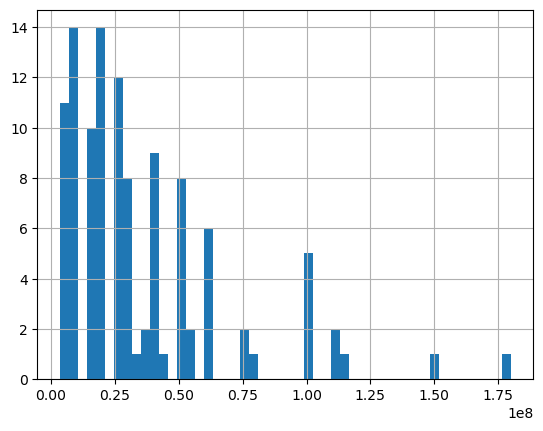

In [77]:
df.query('refundable_support>0')['refundable_support'].hist(bins=50);

На гистограмме мы видим, что есть редкие значения больше `72 000 000`

In [78]:
len(df.query('refundable_support>72000000'))/len(df['refundable_support'])

0.0017368069472277889

Значения больше `60 000 000` редкие и составляют `0.17%`поэтому мы их можем удалить

In [79]:
df=df.drop(df.query('refundable_support>72000000').index)

Смотрим на результат

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7472 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7472 non-null   object             
 1   puNumber               7472 non-null   int32              
 2   show_start_date        7472 non-null   datetime64[ns, UTC]
 3   type                   7472 non-null   object             
 4   film_studio            7472 non-null   object             
 5   production_country     7472 non-null   object             
 6   director               7472 non-null   object             
 7   producer               7472 non-null   object             
 8   age_restriction        7472 non-null   object             
 9   refundable_support     7472 non-null   float64            
 10  nonrefundable_support  7472 non-null   float64            
 11  budget                 319 non-null    float64          

В сводной таблице и на диаграмме мы видим, что
- объем возвратного финансирования распределен в диапазоне от `0` до `60 000 000`

#### 2.5.3 Столбец `nonrefundable_support`

Строим сводную таблицу по столбцу `nonrefundable_support` с рассчетом количества значений

In [81]:
df.groupby(pd.cut(df['nonrefundable_support'], bins=10))['nonrefundable_support'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
nonrefundable_support,,,,,
"(-400000.0, 40000000.0]",0.00,40000000.00,882004.08,0.00,7397
"(40000000.0, 80000000.0]",41500000.00,80000000.00,58149595.91,60000000.00,44
"(80000000.0, 120000000.0]",85000000.00,120000000.00,102131996.07,100000000.00,14
"(120000000.0, 160000000.0]",130000000.00,150000000.00,138852780.71,138969465.00,7
"(160000000.0, 200000000.0]",200000000.00,200000000.00,200000000.00,200000000.00,3
"(200000000.0, 240000000.0]",225000000.00,225000000.00,225000000.00,225000000.00,1
"(240000000.0, 280000000.0]",250000000.00,260000000.00,253333333.33,250000000.00,3
"(280000000.0, 320000000.0]",300000000.00,300000000.00,300000000.00,300000000.00,1
"(320000000.0, 360000000.0]",NaN,NaN,NaN,NaN,0


Строим гистограмму по значениям в столбце `nonrefundable_support`, которые больше `0`

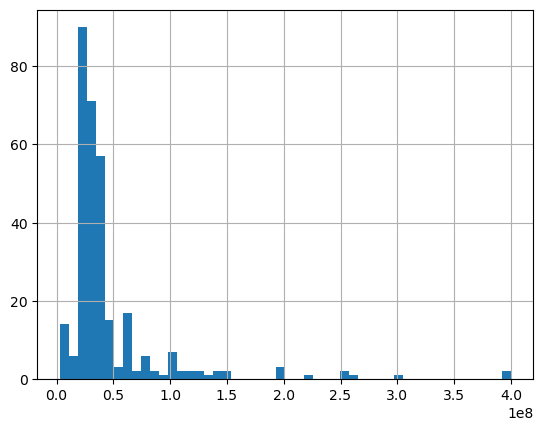

In [82]:
df.query('nonrefundable_support>0')['nonrefundable_support'].hist(bins=50);

На гистограмме мы видим, что есть редкие значения больше `160 000 000`

In [83]:
len(df.query('nonrefundable_support>160000000'))/len(df['nonrefundable_support'])

0.0013383297644539614

Значения больше `160 000 000` редкие и составляют `0.13%`поэтому мы их можем удалить

In [84]:
df=df.drop(df.query('nonrefundable_support>160000000').index)

Смотрим на результат

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7462 non-null   object             
 1   puNumber               7462 non-null   int32              
 2   show_start_date        7462 non-null   datetime64[ns, UTC]
 3   type                   7462 non-null   object             
 4   film_studio            7462 non-null   object             
 5   production_country     7462 non-null   object             
 6   director               7462 non-null   object             
 7   producer               7462 non-null   object             
 8   age_restriction        7462 non-null   object             
 9   refundable_support     7462 non-null   float64            
 10  nonrefundable_support  7462 non-null   float64            
 11  budget                 309 non-null    float64          

В сводной таблице мы видим, что 
- объем возвратного финансирования распределен в диапазоне от `0` до `400 000 000`;  
- основные размеры возвратного финансирования были до `50` миллионов

#### 2.5.4 Столбец `budget`

Строим сводную таблицу по столбцу `budget` с рассчетом количества значений

In [86]:
df.groupby(pd.cut(df['budget'], bins=20))['budget'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
budget,,,,,
"(-779941.965, 38997098.25]",0.00,38858260.00,25700185.30,35760060.00,63
"(38997098.25, 77994196.5]",39000000.00,77401751.00,54165314.45,52492319.00,120
"(77994196.5, 116991294.75]",78096315.00,115000000.00,93789238.47,90278063.00,49
"(116991294.75, 155988393.0]",118000000.00,154989700.00,137590603.29,138841474.50,24
"(155988393.0, 194985491.25]",156360666.00,182659393.00,170263383.88,170122675.00,17
"(194985491.25, 233982589.5]",200067392.00,226271533.00,212355337.62,211810247.00,13
"(233982589.5, 272979687.75]",240041307.00,267288892.00,251096484.14,250000000.00,7
"(272979687.75, 311976786.0]",287802711.00,300000000.00,295434237.00,298500000.00,3
"(311976786.0, 350973884.25]",323232109.00,344905389.00,334568388.33,335567667.00,3


In [87]:
(
    df[['budget']]
    .quantile([0.01, .05, .1, .2, .95, .97, .99])
    .style.format("{:,.5f}")
)

,budget
0.010000,0.00000
0.050000,"5,784,985.60000"
0.100000,"35,750,905.20000"
0.200000,"38,714,956.00000"
0.950000,"279,597,183.40000"
0.970000,"350,660,250.36000"
0.990000,"494,755,417.56000"


Строим гистограмму по значениям в столбце `nonrefundable_support`, которые больше `0`

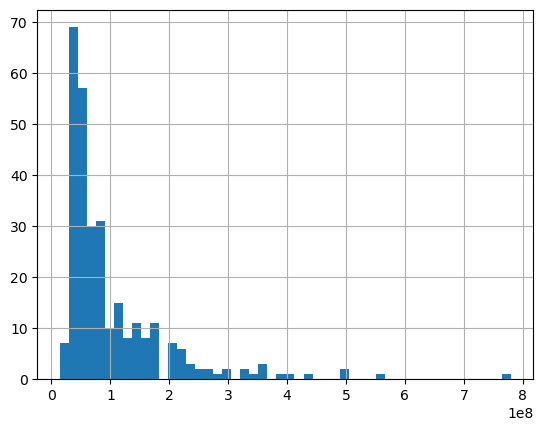

In [88]:
df.query('budget>0')['budget'].hist(bins=50);

В сводной таблице мы видим, что есть фильмы с нулевым бюджетом, а также редкие фильмы с бюджетом больше `389970982.5`

In [89]:
len(df.query('budget==0'))/len(df['budget'])

0.0021441972661484857

In [90]:
len(df.query('budget>389970982.5'))/len(df['budget'])

0.0008040739748056821

Строим гистограмму по значениям в столбце `budget`, которые меньше `5 784 985.6`

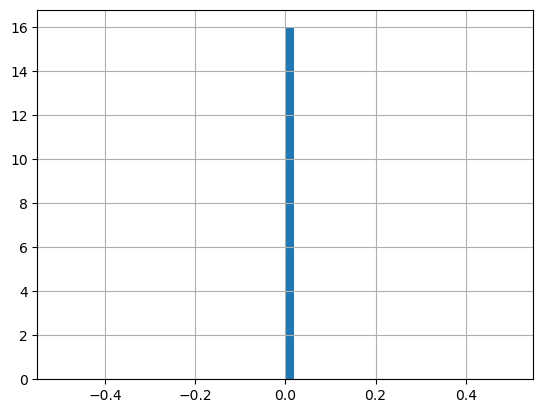

In [91]:
df.query('budget<5784985.6')['budget'].hist(bins=50);

Удалим аномальные нулевые значения(составляют 0.23%) и редкие значения больше `5784985.6`(составляют 0.09%)

In [92]:
df=df.drop(df.query('budget==0').index)

In [93]:
df=df.drop(df.query('budget>389970982.5').index)

Смотрим на результат

In [94]:
df.groupby(pd.cut(df['budget'], bins=20))['budget'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
budget,,,,,
"(14091926.464, 32989340.8]",14462464.00,31305313.00,24780563.18,28115580.00,11
"(32989340.8, 51516217.6]",33000000.00,51196711.00,41875838.41,40276385.00,94
"(51516217.6, 70043094.4]",51850000.00,70000000.00,59861597.98,59968735.00,48
"(70043094.4, 88569971.2]",70086439.00,87649127.00,78554618.24,78554356.00,34
"(88569971.2, 107096848.0]",89782312.00,105721524.00,95598229.59,93000000.00,17
"(107096848.0, 125623724.8]",108518988.00,123714264.00,113627357.81,111906193.50,16
"(125623724.8, 144150601.6]",126932894.00,140025000.00,134551437.75,135115166.50,12
"(144150601.6, 162677478.4]",147866278.00,162630398.00,153505842.17,152196594.50,12
"(162677478.4, 181204355.2]",164780000.00,180000000.00,172208023.91,172763618.00,11


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7440 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7440 non-null   object             
 1   puNumber               7440 non-null   int32              
 2   show_start_date        7440 non-null   datetime64[ns, UTC]
 3   type                   7440 non-null   object             
 4   film_studio            7440 non-null   object             
 5   production_country     7440 non-null   object             
 6   director               7440 non-null   object             
 7   producer               7440 non-null   object             
 8   age_restriction        7440 non-null   object             
 9   refundable_support     7440 non-null   float64            
 10  nonrefundable_support  7440 non-null   float64            
 11  budget                 287 non-null    float64          

В сводной таблице мы видим, что 
- объем бюджетов распределен в диапазоне от `14 462 464` до `385 000 000`;  
- основные размеры возвратного финансирования были до `87 649 127`

#### 2.5.5 Связка столбцов `refundable_support`, `nonrefundable_support` и `budget`

Проверим есть ли строки, где сумма столбцов `refundable_support`, `nonrefundable_support` больше `budget`

In [96]:
df.query('(budget-refundable_support-nonrefundable_support)<0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Итак, данные в колонках `refundable_support`, `nonrefundable_support` и `budget` корректные.

#### 2.5.6 Столбец `ratings`

Строим сводную таблицу по значениям в столбце `ratings`

In [97]:
df.groupby(pd.cut(df['ratings'], bins=10))['ratings'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
ratings,,,,,
"(0.991, 1.89]",1.00,1.80,1.46,1.50,18
"(1.89, 2.78]",1.90,2.70,2.44,2.50,22
"(2.78, 3.67]",2.80,3.60,3.18,3.20,68
"(3.67, 4.56]",3.70,4.50,4.14,4.20,254
"(4.56, 5.45]",4.60,5.40,5.06,5.10,611
"(5.45, 6.34]",5.50,6.30,5.95,6.00,1648
"(6.34, 7.23]",6.40,7.20,6.80,6.80,2240
"(7.23, 8.12]",7.30,8.10,7.66,7.60,1409
"(8.12, 9.01]",8.20,9.00,8.40,8.30,188


Строим гистограмму по значениям в столбце `ratings`

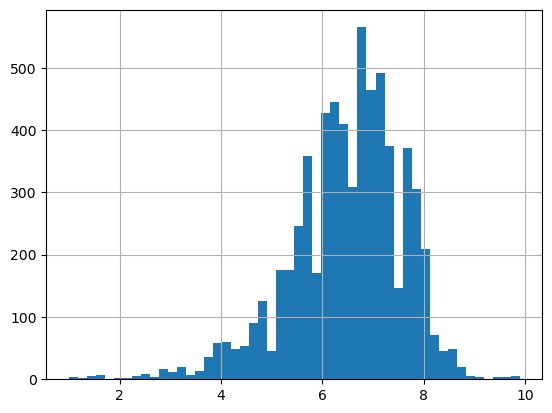

In [98]:
df['ratings'].hist(bins=50);

Мы видим, что 
- больше всего оценок расположены в диапазоне от 5.1 до 8.1;
- все оценки находятся в диапазоне от 1 до 9.9

#### 2.5.7 Столбец `box_office`

Создадим новую колонку, где будут значения колонки `box_office` разделенные на `1 000 000`

In [99]:
df['box_office_m']=df['box_office']/1000000

Строим сводную таблицу по значениям в столбце `box_office_m`

In [100]:
df.groupby(pd.cut(df['box_office_m'], bins=10))['box_office_m'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
box_office_m,,,,,
"(-3.074, 307.357]",0.00,303.79,20.90,1.66,2902
"(307.357, 614.714]",307.65,614.13,443.78,426.61,110
"(614.714, 922.071]",625.16,887.10,749.62,738.80,43
"(922.071, 1229.427]",922.36,1216.78,1048.53,1029.08,26
"(1229.427, 1536.784]",1229.59,1520.63,1380.20,1394.33,16
"(1536.784, 1844.141]",1570.38,1827.24,1664.73,1656.95,8
"(1844.141, 2151.498]",1875.99,2118.40,1961.30,1913.26,7
"(2151.498, 2458.855]",NaN,NaN,NaN,NaN,0
"(2458.855, 2766.212]",2576.61,2576.61,2576.61,2576.61,1


In [101]:
(
    df[['box_office_m']]
    .quantile([0.01, .05, .25, .5, .75, .95, .97, .99])
    .style.format("{:,.5f}")
)

,box_office_m
0.010000,0.00010
0.050000,0.00050
0.250000,0.08220
0.500000,2.23523
0.750000,22.10604
0.950000,431.04709
0.970000,660.22338
0.990000,"1,235.82995"


Строим гистограмму по значениям в столбце `box_office_m` больше `0`

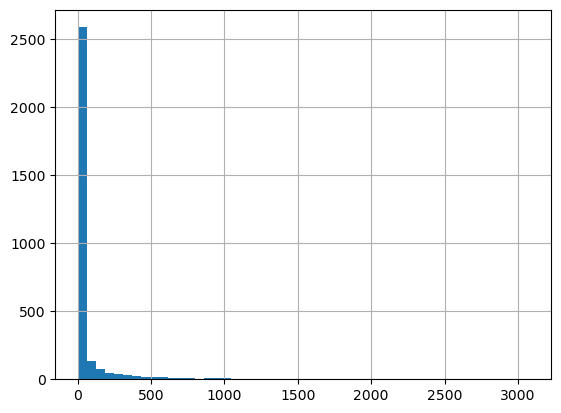

In [102]:
df.query('box_office_m>0')['box_office_m'].hist(bins=50);

Строим гистограмму по значениям в столбце `box_office_m` меньше `2.24`

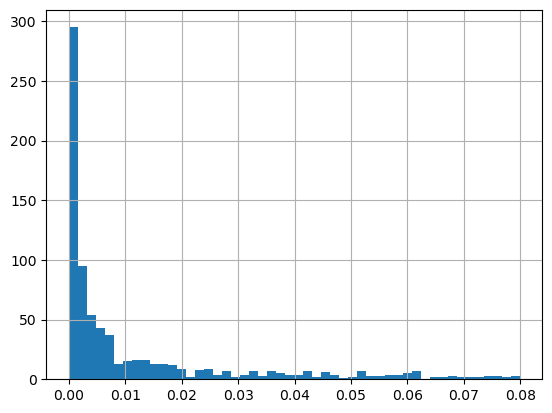

In [103]:
df.query('box_office_m<0.08')['box_office_m'].hist(bins=50);

В сводной таблице мы видим, что есть фильмы с нулевыми сборами, а также редкие фильмы со сборами больше `1536.784`

In [104]:
len(df.query('box_office_m==0'))/len(df['box_office_m'])

0.0032258064516129032

In [105]:
len(df.query('box_office_m>1536.784'))/len(df['box_office_m'])

0.00228494623655914

Удаляем из выборки данные с нулевыми сборами(составляют 0.32%) и со сборами больше `1520.63`(составляю 0.23%)

In [106]:
df=df.drop(df.query('box_office_m==0').index)

In [107]:
df=df.drop(df.query('box_office_m>1536.784').index)

Проверяем результат

In [108]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.groupby(pd.cut(df['box_office_m'], bins=10))['box_office_m'] \
.agg(min='min', max='max',mean='mean', median='median', count='count')

,min,max,mean,median,count
box_office_m,,,,,
"(-1.521, 152.063]",0.00004,152.01330,12.70910,1.49015,2761
"(152.063, 304.125]",152.08204,303.78564,218.39668,209.59479,117
"(304.125, 456.188]",307.65064,453.61649,372.43311,371.74952,61
"(456.188, 608.251]",458.01561,607.22593,530.91098,532.89886,48
"(608.251, 760.313]",614.12609,759.22677,683.56271,681.69555,27
"(760.313, 912.376]",767.27460,887.09920,846.55943,862.47143,17
"(912.376, 1064.439]",922.36221,1060.05428,990.52357,994.39858,16
"(1064.439, 1216.501]",1065.21001,1211.15899,1132.94351,1121.94894,9
"(1216.501, 1368.564]",1216.78141,1307.25412,1257.62503,1246.58786,7


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7399 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7399 non-null   object             
 1   puNumber               7399 non-null   int32              
 2   show_start_date        7399 non-null   datetime64[ns, UTC]
 3   type                   7399 non-null   object             
 4   film_studio            7399 non-null   object             
 5   production_country     7399 non-null   object             
 6   director               7399 non-null   object             
 7   producer               7399 non-null   object             
 8   age_restriction        7399 non-null   object             
 9   refundable_support     7399 non-null   float64            
 10  nonrefundable_support  7399 non-null   float64            
 11  budget                 285 non-null    float64          

Данные в колонке `box_office_m` исправлены   
В сводной таблице мы видим, что 
- объем бюджетов распределен в диапазоне от `0.00004` до `1520.62650`;  
- основные размеры возвратного финансирования были до `152.01330`

### 2.6 Добавляем в таблицу новые столбцы

#### 2.6.1 Столбец `year`

Добавляем в таблицу столбец с годом проката

In [110]:
df['year'] = df['show_start_date'].dt.year

In [111]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,box_office_m,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,7.20000,"боевик,драма,мелодрама",NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.00000,0.00000,NaN,Частное,6.60000,"драма,военный",NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2015


#### 2.6.2 Столбцы `name` и `surname`

Смотрим на возможные разделители 

In [112]:
df.query('director.str.contains(" ")')['director'].unique()[:20]

array(['Кевин Костнер', 'Тимур Бекмамбетов', 'Джон Туртурро',
       'Эрик Беснард', 'Пол Грингросс', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'В.Краснопольский, В.Усков',
       'Лассе Халлстрем', 'Боривой Земан', 'Эндрю Никкол',
       'Джонатан Кинг', 'Даниэль Робишо', 'Грегори Хоблит', 'Крис Нунан',
       'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон', 'Роб Райнер'],
      dtype=object)

In [113]:
df.query('director.str.contains(".")')['director'].unique()[:20]

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков',
       'М.Чиаурели', 'Лассе Халлстрем'], dtype=object)

In [114]:
df.query('director.str.contains(",")')['director'].unique()[:20]

array(['В.Краснопольский, В.Усков', 'Иоахим Реннинг, Эспен Сандберг',
       'Дрю Дэйуолт, Дэвид Шнейдер', 'Айрон Блейз, Роберт Уокер',
       'И.Пырьев, М.Ульянов, К.Лавров', 'К.Юдин, Б.Барнет',
       'М.Швейцер, С.Милькина', 'Крис Уильямс, Байрон Ховард',
       'С.Алексеев, В.Войтецкий', 'Дэнни Панг, Оксид Панг',
       'Эл Гиддингс, Дэвид Кларк', 'Дэвид Моро, Хавьер Палю',
       'А.Столпер, Б.Иванов', 'А.Салтыков, А.Митта', 'Л.Гайдай, Р.Орко',
       'А.Мкртчян, Л.Попов', 'В.Пудовкин, Д.Васильев',
       'С.Бодров, А.Буравский', 'А.Алов, В.Наумов',
       'Тони Бэнкфорт, Бэрри Кук'], dtype=object)

Мы видим, что 
- у фильма может быть как один, так и несколько режиссеров;
- режиссеры между собой разделены знаком `,`;
- имя и фамилия режиссера могут быть разделены знаками `.` и пробел ` `;
- имя может иметь сокращенную запись

Функции по отделению имени и фамилии основного режиссера

In [115]:
def name_split(x):
    if ',' in x:
        main_director=x.split(',')[0]
        if ' ' in main_director:
            main_director_name=main_director.split(' ')[0]
        elif '.' in main_director:
            main_director_name=main_director.split('.')[0]
        else:
            main_director_name='check'
        return main_director_name
    else:
        main_director=x
        if ' ' in main_director:
            main_director_name=main_director.split(' ')[0]
        elif '.' in main_director:
            main_director_name=main_director.split('.')[0]
        else:
            main_director_name='check'
        return main_director_name
    
def surname_split(x):
    if ',' in x:
        main_director=x.split(',')[0]
        if ' ' in main_director:
            main_director_name=main_director.split(' ')[1]
        elif '.' in main_director:
            main_director_name=main_director.split('.')[1]
        else:
            main_director_name='check'
        return main_director_name
    else:
        main_director=x
        if ' ' in main_director:
            main_director_name=main_director.split(' ')[1]
        elif '.' in main_director:
            main_director_name=main_director.split('.')[1]
        else:
            main_director_name='check'
        return main_director_name

In [116]:
df['name']=df['director'].apply(name_split)
df['surname']=df['director'].apply(surname_split)

In [117]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,box_office_m,year,name,surname
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,7.20000,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин,Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.00000,0.00000,NaN,Частное,6.60000,"драма,военный",NaN,NaN,2016,Е,Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур,Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур,Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,0.00000,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур,Бекмамбетов


**Столбцы с именем и фамилией добавлены**

#### 2.6.3 Столбец с долей поддержки от общего бюджета фильма

In [118]:
df['gov_support_perc']=(df['refundable_support']+df['nonrefundable_support'])/df['budget']

In [119]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,box_office_m,year,name,surname,gov_support_perc
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00000,...,NaN,Частное,7.20000,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин,Костнер,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.00000,...,NaN,Частное,6.60000,"драма,военный",NaN,NaN,2016,Е,Матвеев,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,...,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур,Бекмамбетов,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,...,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур,Бекмамбетов,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00000,...,NaN,Частное,6.80000,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур,Бекмамбетов,NaN


Строим гистограмму распределения доли государственной поддержки от общего бюджета фильма

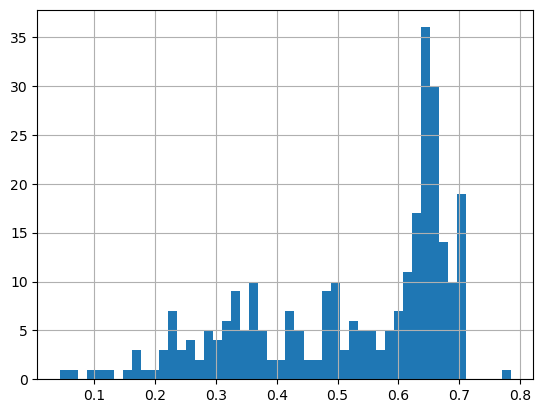

In [120]:
df['gov_support_perc'].hist(bins=50);

Столбец с долей государственной поддержки от общего бюджета фильма добавлен  
Мы видим, что
- основные доли распределены в диапазоне от `0.6` до `0.7`;
- доля государственной поддержки распределена от `0.05` до `0.8`

## 3 Исследовательский анализ данных

### 3.1 Доля фильмов без информации о прокате

Данные о прокате в кинотеатрах известны не для всех фильмов.  
Добавим новую колонку, которая показывает известна ли информация  о прокате или нет

In [121]:
df['box_office_notna']=df['box_office'].notna()

In [122]:
df['box_office_notna'].mean()

0.4153263954588458

Строим сводную таблицу с долей фильмов в прокате по годам

In [123]:
df.groupby('year')['box_office_notna'].mean()

year
2010   0.10296
2011   0.17524
2012   0.20918
2013   0.28640
2014   0.34043
2015   0.65217
2016   0.63727
2017   0.70161
2018   0.52673
2019   0.56346
Name: box_office_notna, dtype: float64

Строим график по сводной таблице

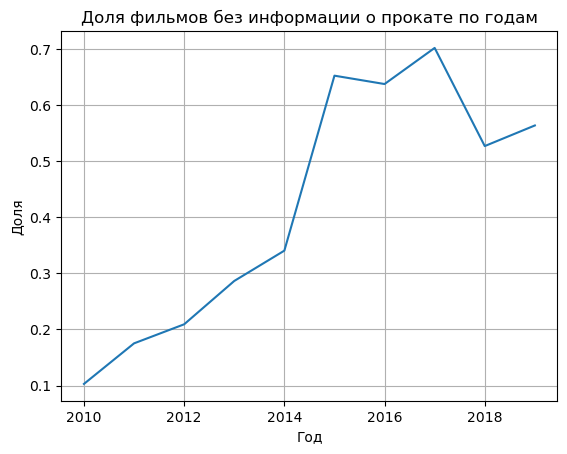

In [124]:
ax = df.groupby('year')['box_office_notna'].mean().plot()

ax.set_title('Доля фильмов без информации о прокате по годам')
ax.set_ylabel('Доля')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Итак, 
- с 2010 по 2019 годы только 44.5% фильмов имеют данные о прокате в кинотеатрах;
- наиболее полно информация о прокате фильма представлена за 2017 год, то есть в этот год меньше всего пропусков

### 3.2 Распределение фильмов по годам

Строим сводную таблицу распределения фильмов по годам

In [125]:
df.groupby('year')['year'].count()

year
2010    981
2011    622
2012    588
2013    625
2014    799
2015    690
2016    805
2017    496
2018    879
2019    914
Name: year, dtype: int64

Строим график по сводной таблице

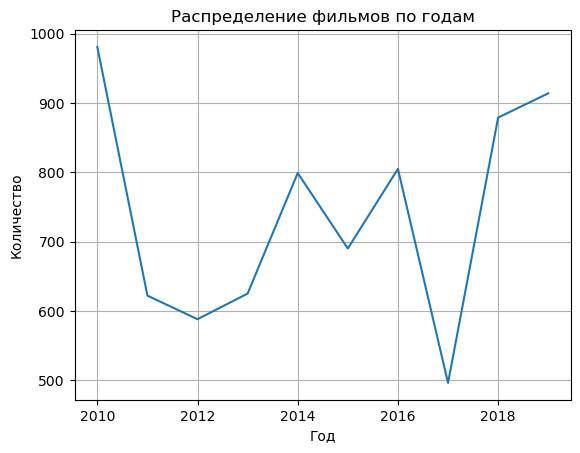

In [126]:
ax = df.groupby('year')['year'].count().plot()

ax.set_title('Распределение фильмов по годам')
ax.set_ylabel('Количество')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Итак, 
- наблюдается два периода снижения количества фильмов `2011` - `2013` и `2017`;
- если просвести средюю линию между значениями то виден рост числа фильмов с `2010` по `2019`

### 3.3 Суммы сборов по годам

Строим сводную таблицу по сборам по годам

In [127]:
year_box_office_group=df.groupby('year')['box_office_m'] \
.agg(min='min', max='max',mean='mean', median='median', sum='sum', count='count')
year_box_office_group

,min,max,mean,median,sum,count
year,,,,,,
2010,0.00007,1.44640,0.02405,0.00171,2.42865,101
2011,0.00013,11.61809,0.12938,0.00300,14.10276,109
2012,0.00008,2.31122,0.05655,0.00622,6.95542,123
2013,0.00004,19.95703,0.16648,0.00358,29.79971,179
2014,0.00005,1016.41064,27.33352,0.02031,7434.71784,272
2015,0.00010,1500.98928,76.70695,4.74267,34518.12939,450
2016,0.00020,1398.26468,72.42041,3.64080,37151.66937,513
2017,0.00790,1468.77968,113.52251,9.48737,39505.83465,348
2018,0.04122,1520.62650,84.92699,8.63720,39321.19844,463


Год минимальных сборов

In [128]:
year_box_office_group['sum'].idxmin()

2010

Год максимальных сборов

In [129]:
year_box_office_group['sum'].idxmax()

2017

Итак
- минимальные сборы были в `2010` году;
- максимальные сборы были в `2017` году

### 3.4 Сравнение средних и медианных сборов по годам

Строим сводную таблицу по сборам по годам

In [130]:

year_box_office_group = df.pivot_table(index='year', values='box_office_m', aggfunc=['mean', 'median'])
year_box_office_group['median_mean']=year_box_office_group['median']/year_box_office_group['mean']
year_box_office_group.columns = ['Средние_сборы', 'Медианные_сборы', 'Доля_медианных_сборов_от_средних']

year_box_office_group.round(3)

,Средние_сборы,Медианные_сборы,Доля_медианных_сборов_от_средних
year,,,
2010,0.02400,0.00200,0.07100
2011,0.12900,0.00300,0.02300
2012,0.05700,0.00600,0.11000
2013,0.16600,0.00400,0.02200
2014,27.33400,0.02000,0.00100
2015,76.70700,4.74300,0.06200
2016,72.42000,3.64100,0.05000
2017,113.52300,9.48700,0.08400
2018,84.92700,8.63700,0.10200


Строим графики средних и медианных сборов

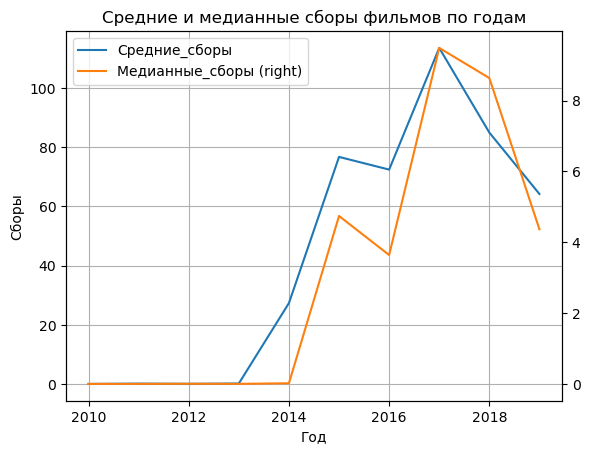

In [131]:
ax = year_box_office_group[['Средние_сборы', 'Медианные_сборы']].plot(secondary_y=['Медианные_сборы'])

ax.set_title('Средние и медианные сборы фильмов по годам')
ax.set_ylabel('Сборы')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Строим график отшения медианных сборов к средним

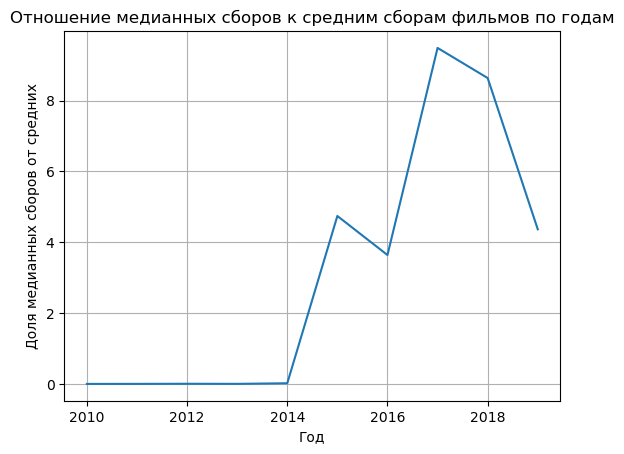

In [132]:
ax = year_box_office_group[['Медианные_сборы']].plot(legend=False)

ax.set_title('Отношение медианных сборов к средним сборам фильмов по годам')
ax.set_ylabel('Доля медианных сборов от средних')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Мы видим, что графики средних и медианных сборов имеют схожие формы по года, но отличаются значениями. Средние сборы имеют большие значения из-за того, что в выборке фильмов присутствуют фильмы с большими сборами влияющие на среднее. По изменению отношения медианных сборов к средним нет четкой зависимости и оно то находится выше 0.06, то ниже. А начиная с 2014 года наблюдается резкий рост сборов.

### 3.5 Сравнение влияния возрастного ограничения на сборы

Смотрим на средние сборы фильмов по годам в разных категориях

In [133]:
age_restriction_year_box_office_mean=df.query('year>=2015') \
                                    .pivot_table(index='age_restriction', \
                                                 columns='year', \
                                                 values='box_office_m', \
                                                 aggfunc='mean') \
                                    
age_restriction_year_box_office_mean.round(2)

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,9.98000,3.66000,76.53000,6.49000,5.92000
«12+» - для детей старше 12 лет,165.24000,136.41000,127.72000,173.24000,107.10000
«16+» - для детей старше 16 лет,65.74000,82.36000,136.14000,71.10000,57.06000
«18+» - запрещено для детей,41.45000,34.71000,65.66000,48.94000,45.23000
«6+» - для детей старше 6 лет,136.55000,98.98000,207.31000,137.06000,81.99000


Смотрим на количество вышедших фильмов, с известными сборами, по годам в разных категориях

In [134]:
age_restriction_year_box_office_count=df.query('year>=2015') \
                                    .pivot_table(index='age_restriction', \
                                                 columns='year', \
                                                 values='box_office_m', \
                                                 aggfunc='count') \
                                    
age_restriction_year_box_office_count

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,38,41,3,5,3
«12+» - для детей старше 12 лет,68,77,38,64,83
«16+» - для детей старше 16 лет,164,178,118,152,174
«18+» - запрещено для детей,131,150,147,179,182
«6+» - для детей старше 6 лет,49,67,42,63,73


Смотрим на медианные сборы фильмов по годам в разных категориях

In [135]:
age_restriction_year_box_office_median=df.query('year>=2015') \
                                    .pivot_table(index='age_restriction', \
                                                 columns='year', \
                                                 values='box_office_m', \
                                                 aggfunc='median') \
                                    
age_restriction_year_box_office_median.round(2)

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,2.95000,2.57000,22.18000,3.62000,3.89000
«12+» - для детей старше 12 лет,14.70000,3.78000,6.27000,8.35000,3.40000
«16+» - для детей старше 16 лет,4.45000,4.85000,9.49000,8.68000,3.08000
«18+» - запрещено для детей,4.65000,6.06000,8.21000,7.18000,5.50000
«6+» - для детей старше 6 лет,18.22000,2.35000,46.19000,13.72000,7.90000


Строим тепловую карту по средним сборам по годам в разных категориях

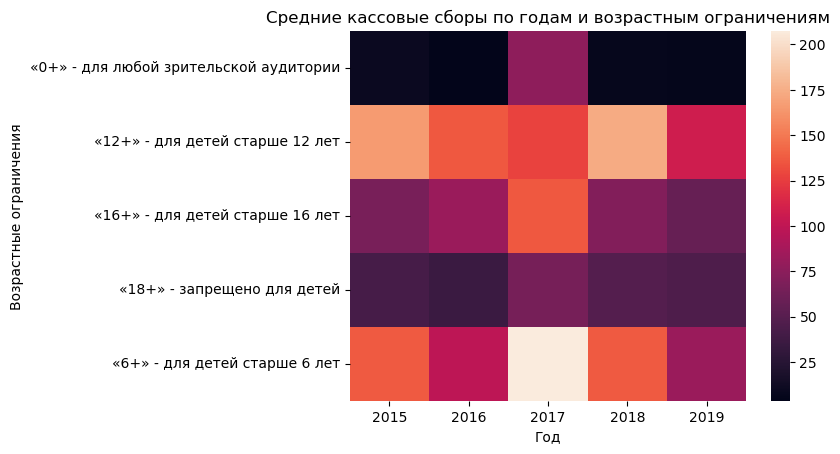

In [136]:
ax = sns.heatmap(age_restriction_year_box_office_mean)

ax.set_xlabel("Год")
ax.set_ylabel("Возрастные ограничения")
ax.set_title("Средние кассовые сборы по годам и возрастным ограничениям")

plt.show()

Наибольшее значения наблюдается в категории `6+` в `2017` году

Смотрим, какие фильмы были в ТОП по сборам в `2017` году

In [137]:
df.query('age_restriction=="«6+» - для детей старше 6 лет" and year==2017') \
  .groupby('title')['box_office_m'] \
  .sum() \
  .sort_values(ascending=False).head(10).round(2)

title
Гадкий я 3                                1390.39000
Босс-Молокосос                            1376.73000
Зверопой                                   886.61000
Ёлки Новые                                 855.45000
Три богатыря и принцесса Египта            759.23000
Фердинанд                                  576.77000
Тачки 3                              Лу    558.05000
Фиксики. Большой секрет                    416.35000
Эмоджи фильм                    Пёсик!     352.06000
Смурфики: Затерянная деревня               209.62000
Name: box_office_m, dtype: float64

Мы видим, что
- сборы с `2015` по `2019` зависят от возрастного ограничения
- наибольшие сборы были в категории `6+` и `12+`
- максимальные сборы были в `2017` в категории `6+`

Сборы в `2017` году в категории `6+` были большими, не смотря на снижение количества фильмов, так как в этот год вышло в прокат несколько очень популярных мультфильмов, таких как  `Гадкий я 3`, `Босс-Молокосос` и `Зверопой`

## 4 Исследование фильмов с государственной поддержкой

### 4.1 Исселдование изменения видов государственной поддержки по годам

Добавим колонку с общим объемом средств на поддерку кино

In [138]:
df['support']=df['refundable_support']+df['nonrefundable_support']

Строим сводную таблицу с изменением поддержки кино по годам

In [139]:
support_types_per_year = df.groupby('year')[['support', 'refundable_support', 'nonrefundable_support']].mean()
support_types_per_year.columns = ['Общее_финансирование', 'Возвратное_финансирование', 'Невозвратное_финансирование']

support_types_per_year.round(2)

,Общее_финансирование,Возвратное_финансирование,Невозвратное_финансирование
year,,,
2010,0.00000,0.00000,0.00000
2011,0.00000,0.00000,0.00000
2012,0.00000,0.00000,0.00000
2013,214956.71000,0.00000,214956.71000
2014,687111.76000,88861.08000,598250.69000
2015,4087916.53000,691526.26000,3396390.27000
2016,3024908.07000,599378.88000,2425529.19000
2017,2971717.06000,684167.10000,2287549.96000
2018,2551763.37000,389078.50000,2162684.87000


Строим график по сводной таблице изменения видов государственной поддержки кино по годам

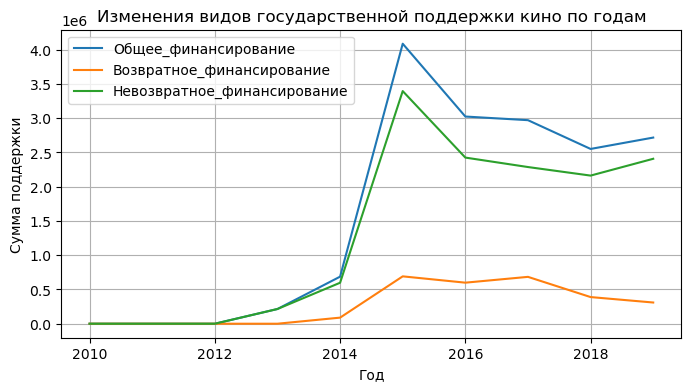

In [140]:
ax = support_types_per_year.plot(figsize=(8,4))

ax.set_title('Изменения видов государственной поддержки кино по годам')
ax.set_ylabel('Сумма поддержки')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Мы видим, что основная часть поддержки фильмов это невозвратное финансирование

### 4.2 Изменение количества фильмов с государственой поддержкой по годам

Считаем количество фильмов с государственной поддержкой по годам

In [141]:
supported_films_per_year = df.query('support>0').groupby('year')['support'].count()
supported_films_per_year.columns = ['']

supported_films_per_year

year
2013     2
2014    15
2015    76
2016    53
2017    33
2018    47
2019    59
Name: support, dtype: int64

Строим график количества фильмов с государственной поддержкой

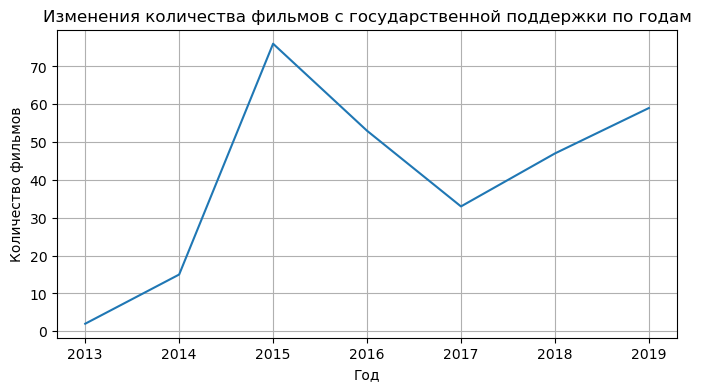

In [142]:
ax = supported_films_per_year.plot(figsize=(8,4))

ax.set_title('Изменения количества фильмов с государственной поддержки по годам')
ax.set_ylabel('Количество фильмов')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Мы видим, что поддержка кино,в нашей выборке, началась с 2013 года

Посмотрим на то как менялось количество фильмов в прокатеи

In [143]:
films_per_year = df.groupby('year')['year'].count()
films_per_year.columns = ['Год']

films_per_year

year
2010    981
2011    622
2012    588
2013    625
2014    799
2015    690
2016    805
2017    496
2018    879
2019    914
Name: year, dtype: int64

Строим график количества фильмов по годам

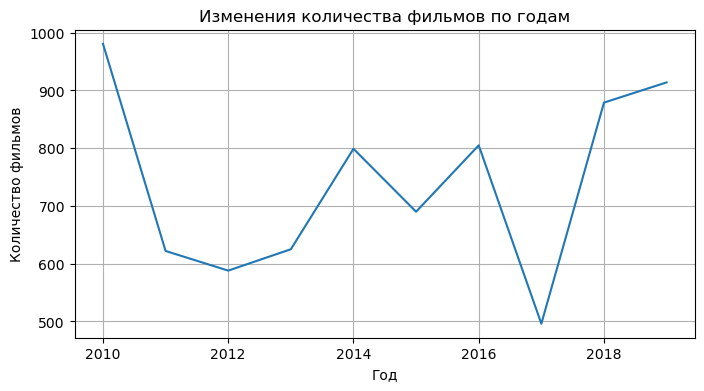

In [144]:
ax = films_per_year.plot(figsize=(8,4))

ax.set_title('Изменения количества фильмов по годам')
ax.set_ylabel('Количество фильмов')
ax.set_xlabel('Год')
ax.grid()
ax.plot();

Мы видим, что снижение количества фильмов наблюдалось с 2010 по 2012 года и в 2017 в прокате.

### 4.3 Исследование окупаемости фильмов с государственной поддержкой

Рассчитаем окупаемость фильмов с государственной поддержкой

In [145]:
len(df.query('budget<box_office'))/len(df.query('support>0'))

0.1824561403508772

Мы видим, что только 18.2% фильмов с поддержкой окупились

Добавим колонку с размером дохода

In [146]:
df['profit']=df['box_office']-df['budget']

Строим график зависимости дохода от государственной поддержки

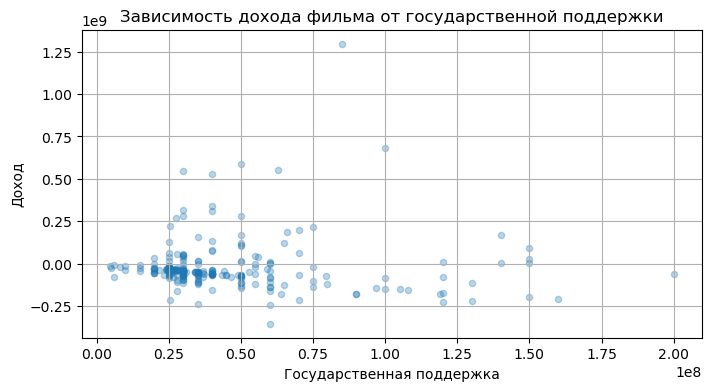

In [147]:
ax = df.plot(x='support', y='profit', kind='scatter', grid=True, alpha=0.3, figsize=(8,4))

ax.set_title('Зависимость дохода фильма от государственной поддержки')
ax.set_ylabel('Доход')
ax.set_xlabel('Государственная поддержка')
ax.plot();

Итак, только малая часть фильмов(`18.2%`) с государственной поддержкой окупилась. Размер государственной поддержки не влияет на окупаемость фильмов.

### 4.4 Исследование влияние государственной поддержки на рейтинг фильмов

Строим график зависимости рейтинга от наличия государственной поддержки и при ее отсутствии

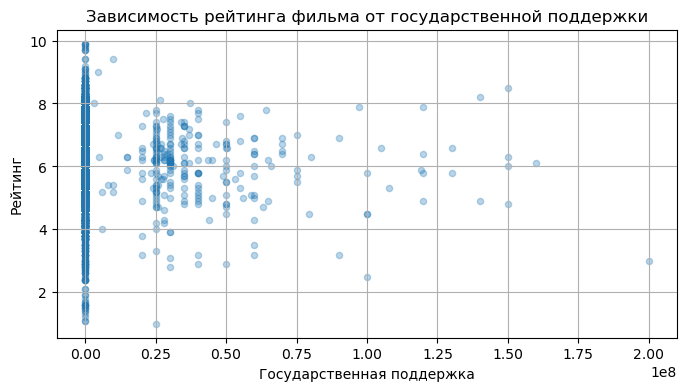

In [148]:
ax = df.plot(x='support', y='ratings', kind='scatter', grid=True, alpha=0.3, figsize=(8,4))

ax.set_title('Зависимость рейтинга фильма от государственной поддержки')
ax.set_ylabel('Рейтинг')
ax.set_xlabel('Государственная поддержка')
ax.plot();

Итак, на графике видем  что у фильмов с государственной поддержкой меньше плохих оценок пользователей. Основная часть фильмов имеет ценки не хуже `4.5`, тогда как у фильмов без поддержки есть много фильмов с оценкой от `2.3` до `4.5`

Итак, мы видим, что
- основная часть поддержки фильмов, это невозвратное финансирование;
- поддежка кино,в нашей выборке, началась с `2013` года;
- с `2010` по `2012` год и в `2017` году наблюдалось падение числа фильмов;
- с `2013` года, вместе с ростом поддержки кино мы видим рост числа фильмов(наблюдается связь поддерки кино и числа фильмов);
- в `2017` году было сокращение поддержкикино и снижение числа фильмов(наблюдается связь поддерки кино и числа фильмов);
- только `18.2%` фильмов с поддержкой окупились;
- наибольшее количество оценок фильмов с поддержкой пользователей находятся в диапазоне от `4.5` до `7.9`, тогда как оценки фильмов без поддержки распределены в более широком диапазоне от `2.3` до `9`(то есть поддержка фильмов положительно сказывается на оценках пользователей)

## 5 Вывод

По заказу Министерства культуры Российской Федерации необходимо изучить рынок российского кинопроката, выявить текущие тренды и изучить влияние государственной поддержки фильмов.  
В качестве входных данных есть два файла
- набор данных с номерами прокатных удостоверений, информацией о фильмах с сайта Кинопоиск и размерами государственной поддержки и бюджетами фильмов;
- набор данных с номерами прокатных удостоверений и сборами фильмов в кинотеатрах

Цель исследования
- изучить динамику проката по годам;
- изучить изменение сумм сборов в разные годы;
- изучить влияние возрастной категории на сборы фильмов;
- изучить изменение объемов государственной поддержки по годам; 
- проанализировать влияние государственной поддержки на прибыльность фильмов;
- проверить влияние государственной поддержки на рейтинг фильмов. 

На первом этапе мы
- загрузили данные из файлов;
- подготовили таблицы для объединения, исправив данные и скорректировав тип общей колонки;
- объединили таблицы

На втором этапе мы
- проверили корректность типов столбцов и исправили типы данных в столбцах `show_start_date` и `ratings`;
- заменили попущенные значения в столбцах `refundable_support`, `nonrefundable_support` нулями, а в столбце `financing_source` на `Частное`;
- заменили попущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, `genres` на `Неизвестно`;
- проверили и устранили неявные дубликаты в столбцах `type`, `film_studio`, `director` и `producer` удалением лишних пробелов;
- выявили, что в категориальных значениях знаки `,` усложняют анализ по категоряим(перед исследованием нужно разделять данные);
- проверили и избавились от аномальных и редких значений в колонках `refundable_support`, `nonrefundable_support`, `budget` и `box_office`;
- добавили столбцы с годом проката, фамилией и именем главного режиссера и суммарной государственной поддержкой

На третьем этапе мы
- выяснили, что только `44.5%` фильмов имеют данные о прокате в кинотеатрах;
- нашли года минимальных и максимальных сборов и выяснли, что на рост сборов влияет появление в прокате популярных фильмов
- выявили, что сборы зависят от возрасного ограничени, наибольшие сборы были в категориях `6+` и `12+`;

На четвертом этапе мы 
- выяснили что основная часть поддержки фильмов, это невозвратное финансирование;
- нашли связь поддежки кино и увеличения количества фильмов;
- рассчитали, что только `18.2%` фильмов с поддержкой окупились;
- размер государственной поддержки не влияет на окупаемость фильмов;
- выяснили, что государственная поддержка фильмов положительно сказывается на оценках пользователей и повышает нижнюю границу с `2.3` до `4.5`  


В итоге мы выяснили что на рост количества фильмов в прокате влияют как появление популярных фильмов, так и госудастрвенное финансирование, но при этом госудаственное финансирование влияет на рейтинг фильма и не влияет на его окупаемость. При это государственное финансирование чаще всего невозвратное. Из этого можно сделать вывод, что госудаственное финансирование не направлено на получение дохода, а преследует цель просвещения. 